# Verhältnis von Codechanges im Build

In [4]:
import dask.dataframe as dd
import pandas as pd

def sloc_percent(row):
    row['sloc_percent'] = 100*(row.git_diff_src_churn.astype('float')/row.gh_sloc.astype('float'))
    return row

df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','gh_is_pr','git_trigger_commit','gh_sloc','git_diff_src_churn','gh_diff_files_added','gh_diff_files_deleted','gh_diff_files_modified'])
#df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','git_trigger_commit','gh_sloc','git_diff_src_churn'])
pdf = df.drop_duplicates().map_partitions(sloc_percent).compute()

## Aufsteigende Changes (Wenig Änderungen)

In [5]:
pdf.sort_values('sloc_percent',inplace=True,ascending=False)
pdf.head(20)

,tr_build_id,gh_project_name,gh_is_pr,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified,gh_sloc,sloc_percent
25603,76568953,ReactiveX/RxJava,False,1,639cbc529541f58d8ad9a94a5fdb8ab8eca6afbd,27258,0,298,1,3,908600.000000
19640,416091,Compass/compass-rails,False,16,bfb7b09370323247e77ed6b8cf5fd33847d58814,24782,254,215,11,11,225290.909091
3164,46755790,junegunn/fzf,False,1,209a6d36ad900468d54ce0c2d13fefed2c4c836e,3946,36,0,4,7,56371.428571
19704,45778280,junegunn/fzf,False,1,f3177305d5572b26f135fc045481358b4eb1bf69,3333,30,0,2,7,47614.285714
19708,45778839,junegunn/fzf,True,1,f3177305d5572b26f135fc045481358b4eb1bf69,3333,30,0,2,7,47614.285714
37673,2964376,mperham/sidekiq,True,30,410fa639af9fedda9ff4b823c30f766817cdb063,2296,33,6,9,5,45920.000000
2334,9446939,thoughtbot/high_voltage,False,1,e1c5165afe14437d4ea9d1f8cfed95ca47a3eb01,4089,9,74,2,9,45433.333333
15151,1327202,joliss/jquery-ui-rails,False,2,c89a75038bf76fe8202389475868d26b9a3b6f88,13666,127,0,2,95,14385.263158
27550,46649355,junegunn/fzf,False,3,7a2bc2cada971c7a390d09b0afda34780ff56fb6,960,0,0,26,7,13714.285714
27554,46649365,junegunn/fzf,True,3,7a2bc2cada971c7a390d09b0afda34780ff56fb6,960,0,0,26,7,13714.285714


Ergebnis: Viele Builds haben gar keine Änderungen an den Source Code files. Diese Dateien interessieren uns nicht.

## Absteigende Changes (Viele Änderungen)

In [3]:
pdfrange = pdf[(pdf.sloc_percent > 0.0) & (pdf.sloc_percent < 10)]
pdfrange.head(20)

,tr_build_id,gh_project_name,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_sloc,sloc_percent
32625,4951753,mikera/vectorz,37,77595c0867bc921a3b33bfea7f03ed20cb62b917,828,8282,9.997585
31312,4000546,tdiary/tdiary-core,20,1894c6af7a17ddd7ea8ab2375054993714258347,2863,28637,9.997556
1240,69559888,lenskit/lenskit,1,dc9b8c1d04fe2b924ad3d4c6c94d2a3fd53ba6f6,2920,29210,9.996577
10309,11042136,troessner/reek,2,f9c96e1a33b0a0731dc8d4eb42cae83b4d90bd1e,255,2551,9.996080
16781,5735670,rspec/rspec-mocks,3,55ad2db29c985e1b4ea6878ea759c783433aa57c,208,2081,9.995195
2089,38218344,segmentio/analytics-android,6,0796f09ed4ba0e85d50fc0b58186b77cd6cb67aa,760,7604,9.994740
2088,38218226,segmentio/analytics-android,6,0796f09ed4ba0e85d50fc0b58186b77cd6cb67aa,760,7604,9.994740
5810,63964061,celluloid/dcell,1,94fab46dc0a39640b4257ea68c2bfa6506fd59e8,185,1851,9.994598
7252,25609902,notnoop/java-apns,1,4ed575d65672de4e95430f00fd1298406e7a0068,172,1721,9.994189
20438,2200768,floere/phony,7,91f30c3495360289c3fdc41eb40c679d9af299bd,673,6734,9.994060


Ergebnis: Builds ohne Source Code changes (sloc_percent == 0) wurden raus gefiltert.

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EBB0BE0>]], dtype=object)

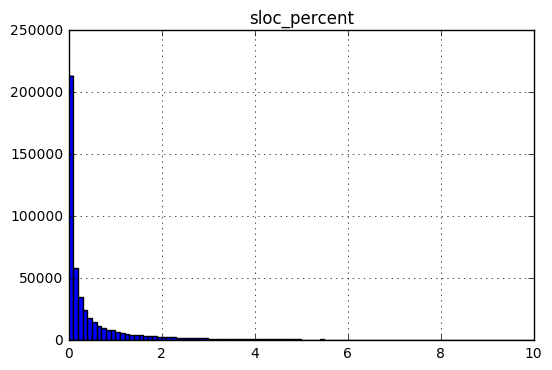

In [4]:
%pylab inline
pdfrange.hist(column='sloc_percent',bins=100)

Ergebnis: Die meisten Builds beinhalten nur wenige geänderte Code Zeilen. Hier wurden alle Projekte mit weniger als 10% Änderungen betrachtet.